# Appendix B: Axelrod Simulation Code

In this notebook we are using the library from the axelrod Python library to conduct Axelrod Tournaments.

Python library citation:

Knight W. et al.. Axelrod-Python/Axelrod: v4.12.0. Version v4.12.0. 2021 Oct. doi: 10.5281/zenodo.5616793. Available from: https://doi.org/10.5281/zenodo.5616793

In [2]:
import axelrod as axl

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# ensure custom method imported
from axelrod import WWS #redundant
print(axl)
axl.WWS()

<module 'axelrod' from '/Users/waltershen/Desktop/School Work 2021-2022/Games Project/Axelrod-dev/axelrod/__init__.py'>


Half Lazy TFT

Introduce the custom strategy: a player starts by cooperating and then on only responds to opponent defects every other time, otherwise the player just cooperates.

The code is slight moficiation of original TFT strategy and by Axelrod criteria can be classified as "nice".

In [5]:
# Briefly test out aginst AllC, always cooperates
players = (axl.WWS(), axl.Cooperator())
match = axl.Match(players, 25)
match.play()
print(match.sparklines())  

█████████████████████████
█████████████████████████


In [6]:
# Briefly test out aginst AllD, only defects for every two defections
players = (axl.WWS(), axl.Defector())
match = axl.Match(players, 25)
match.play()
print(match.sparklines()) 

██ █ █ █ █ █ █ █ █ █ █ █ 
                         


We first simulate Axelrod's First Tournament in 1980. The below cell uses code from the axelrod library documentation:

https://axelrod.readthedocs.io/en/stable/tutorials/running_axelrods_first_tournament/index.html

In [7]:
# simulate Axelrod's First Tournament in 1980. We are using code from the axelrod library documentation, from
# https://axelrod.readthedocs.io/en/stable/tutorials/running_axelrods_first_tournament/index.html

first_tournament_participants_ordered_by_reported_rank = [s() for s in axl.axelrod_first_strategies]
number_of_strategies = len(first_tournament_participants_ordered_by_reported_rank)

print("Ranking from Axelrod First Tournament:\n")
for player in first_tournament_participants_ordered_by_reported_rank:
    print(player)
    
tournament = axl.Tournament(
    players=first_tournament_participants_ordered_by_reported_rank,
    turns=200,
    repetitions=5,
    seed=1,
)
results = tournament.play()

print("\nRanking from Axelrod Simulated Tournament, set seed:\n")
for name in results.ranked_names:
    print(name)

Ranking from Axelrod First Tournament:

Tit For Tat
First by Tideman and Chieruzzi: (D, D)
First by Nydegger
First by Grofman
First by Shubik
First by Stein and Rapoport: 0.05: (D, D)
Grudger
First by Davis: 10
First by Graaskamp: 0.05
First by Downing
First by Feld: 1.0, 0.5, 200
First by Joss: 0.9
First by Tullock
First by Anonymous
Random: 0.5


Analysing: 100%|██████████| 25/25 [00:00<00:00, 77.67it/s]


Ranking from Axelrod Simulated Tournament, set seed:

First by Stein and Rapoport: 0.05: (D, D)
First by Grofman
First by Shubik
Tit For Tat
First by Nydegger
First by Tideman and Chieruzzi: (D, D)
Grudger
First by Davis: 10
First by Graaskamp: 0.05
First by Downing
First by Feld: 1.0, 0.5, 200
First by Tullock
First by Joss: 0.9
First by Anonymous
Random: 0.5


/Users/waltershen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


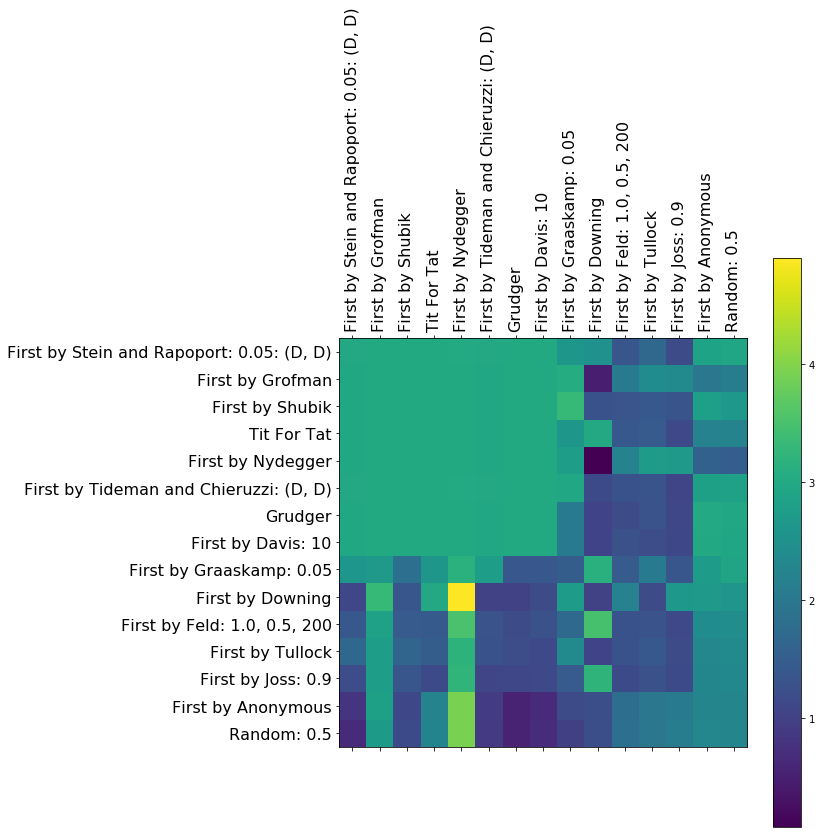

In [10]:
# Plot payoff matrix as heatmap
plot = axl.Plot(results)
p = plot.payoff()
p.show()

# According to Axelrod, all top 8 submissions were nice (and this is reflected in top left corner)

In [9]:
# simulate Axelrod's First Tournament but also included custom Half Lazy for Tat

first_tournament_participants_ordered_by_reported_rank = [s() for s in axl.axelrod_first_strategies]+[axl.WWS()]
number_of_strategies = len(first_tournament_participants_ordered_by_reported_rank)

print("Ranking from Axelrod First Tournament:\n")
for player in first_tournament_participants_ordered_by_reported_rank:
    print(player)
    
tournament = axl.Tournament(
    players=first_tournament_participants_ordered_by_reported_rank,
    turns=200,
    repetitions=5,
    seed=1,
)
results = tournament.play()

print("\nRanking from Axelrod Simulated Tournament, set seed:\n")
for name in results.ranked_names:
    print(name)

Ranking from Axelrod First Tournament:

Tit For Tat
First by Tideman and Chieruzzi: (D, D)
First by Nydegger
First by Grofman
First by Shubik
First by Stein and Rapoport: 0.05: (D, D)
Grudger
First by Davis: 10
First by Graaskamp: 0.05
First by Downing
First by Feld: 1.0, 0.5, 200
First by Joss: 0.9
First by Tullock
First by Anonymous
Random: 0.5
Half Lazy TFT


Analysing: 100%|██████████| 25/25 [00:00<00:00, 81.55it/s]


Ranking from Axelrod Simulated Tournament, set seed:

First by Stein and Rapoport: 0.05: (D, D)
Half Lazy TFT
First by Shubik
First by Grofman
Tit For Tat
First by Tideman and Chieruzzi: (D, D)
First by Nydegger
Grudger
First by Davis: 10
First by Graaskamp: 0.05
First by Downing
First by Feld: 1.0, 0.5, 200
First by Tullock
First by Joss: 0.9
Random: 0.5
First by Anonymous


/Users/waltershen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


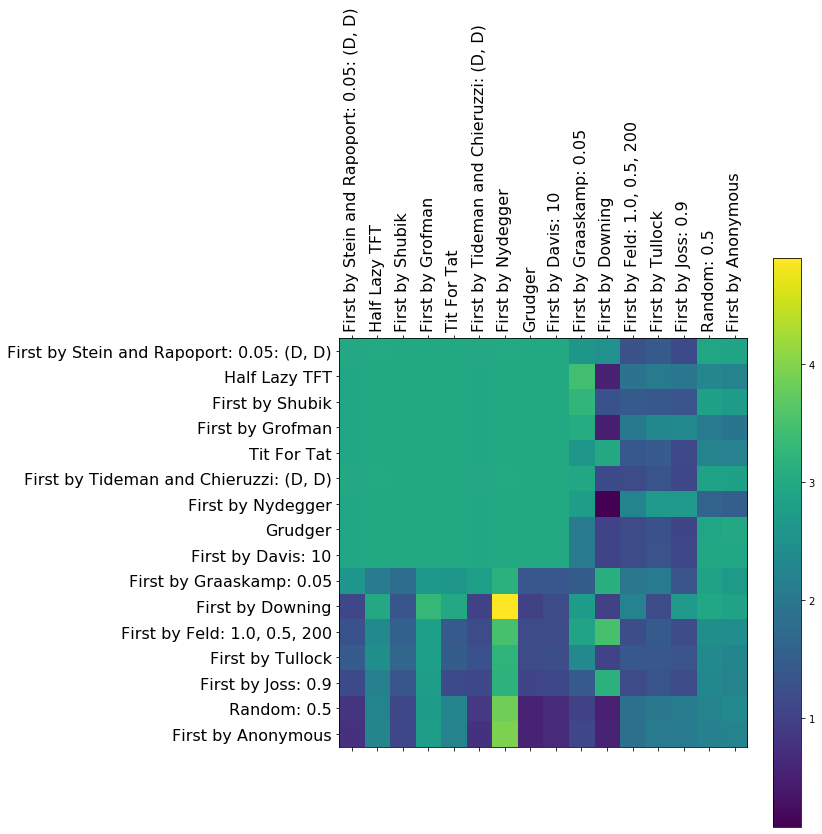

In [10]:
# Plot payoff matrix as heatmap
plot = axl.Plot(results)
p = plot.payoff()
p.show()